# 07.05 - Logistic Regression using Scikit Learn

The forthcoming notebook is a modification of Lab 06.01 - Logistic Regression. The original lab utilized PyTorch for the creation of our Logistic Regression model. However, in this revised notebook, we will employ Scikit Learn instead. The primary objective of this change is to demonstrate the relative ease and simplicity of using Scikit Learn for Logistic Regression, as compared to PyTorch.

## Introduction

Logistic regression serves as a crucial link between regression and classification. It is widely recognized as the go-to algorithm for binary classification.

One of the key characteristics of logistic regression is that it predicts continuous values, despite being a classification model. For instance, it can predict the continuous probabilities between 0 and 1 - like the probability of an individual turning up to vote.

Nevertheless, logistic regression primarily functions as a classification model. It uses the predicted continuous probabilities to classify an outcome as either 0 or 1. For instance, based on the predicted probability, it can predict whether a person votes or not.

In this lab, we'll be focusing on binary outcome cases with two classes. However, it's important to note that logistic regression can be extended to multiple classes.

There are several practical instances where logistic regression comes in handy, such as:

- Predicting whether a user will purchase a product, based on characteristics like income, age, and number of family members.
- Diagnosing a patient with a specific disease based on their symptoms.
- Anticipating if an individual will default on their loan.
- Identifying if the iris flower in question is an "*Iris versicolor*".
- Deciding, given one's GPA and the prestige of a college, whether a student will be admitted to a specific graduate program.

These are just a few examples. The potential applications of logistic regression are many and varied.

For this lab, we will be utilizing PyTorch, a powerful and flexible open-source machine learning framework that provides a wide array of algorithms and models, including logistic regression.

## Graduate School Admissions

In this exercise, we're going to use logistic regression to solve a binary classification problem: "Given one's GPA and the prestige of a college, will a student be admitted to a specific graduate program?"

Our dataset includes four columns:

- `admit`: A binary 0/1 variable indicating the admission status of a student. In this case, 1 means the student was admitted, and 0 implies the student was not admitted.
- `gre`: The [GRE (Graduate Record Exam)](https://en.wikipedia.org/wiki/Graduate_Record_Examinations) score of the student.
- `gpa`: The student's Grade Point Average (GPA).
- `prestige`: This is a rating from 1-4 for the college's "prestige." A lower number indicates higher prestige.

In [1]:
# Import pandas library
import pandas as pd

# Read in the data.
# The function pd.read_csv() is used to read the csv file 'admissions.csv' from the current directory.
# The data is stored in a pandas DataFrame, which is a 2-dimensional labeled data structure with columns of potentially different types.
df = pd.read_csv('./admissions.csv')

# Check first five rows.
# The .head() function is used to get the first n rows of a DataFrame. By default, it returns the first 5 rows.
df.head()

# Check for missing values.
# The .isnull() function is used to detect missing values in the DataFrame.
# The .sum() function is then used to calculate the sum of these missing values.
df.isnull().sum()

# Drop every row that has a NA.
# First, the .shape attribute is used to get the current shape of the DataFrame (number of rows and columns).
df.shape
# The .dropna() function is used to remove missing values.
# The 'inplace=True' argument is used to make the change in the original DataFrame.
df.dropna(inplace=True)
# Finally, the shape of the DataFrame is checked again to see how many rows were dropped.
df.shape

(397, 4)

**What assumption are we making when we drop rows that have at least one NA in it?**

When we choose to drop rows containing at least one NA value, we are making some key assumptions about our data. The primary assumption is that the rows we are dropping are representative of the data we have observed. In other words, we are assuming there's nothing unique or special about the rows we are dropping that could impact our model's ability to learn from the data.

We might also suggest that the dropped data represents a random sample of our entire dataset. If this is true, dropping these rows shouldn't significantly alter the underlying patterns or relationships in the data that our model is trying to learn.

Finally, it's worth noting that the formal term for this assumption is that our data is missing completely at random (MCAR). This term implies that the missingness of data is independent of any other variable in our dataset, meaning that there is no systematic relationship between the missing values and other observed data. If this assumption does not hold, our model could be biased and our results may be unreliable.

**Suppose I want to check if a value of 1 for prestige means "most prestigious" or "least prestigious." How might I find this out?**

To investigate whether a value of 1 for 'prestige' denotes the "most prestigious" or "least prestigious," you can proceed as follows:

1. Look for a data dictionary: A data dictionary often accompanies datasets and contains detailed descriptions of the data. If available, this dictionary might explicitly state what the 'prestige' values represent.
2. Analyze the relationship between 'prestige' and 'admit': If a data dictionary is not available, you can analyze the data by comparing the 'prestige' and 'admit' columns. Here's an approach using the pandas library and the PyTorch library.
- First, you can group the data by 'prestige' and calculate the mean of the 'admit' column for each group. This approach can give you an overview of the rate of admission for each 'prestige' category.

In [2]:
# Group by 'prestige' and calculate the mean of 'admit' for each group
df.groupby('prestige').admit.mean()

prestige
1.0    0.540984
2.0    0.358108
3.0    0.231405
4.0    0.179104
Name: admit, dtype: float64

- Secondly, you can choose to visualize the data, which could provide a more intuitive understanding of the relationship. You could use a tool like matplotlib to create a bar plot of the average admission rate for each prestige category.

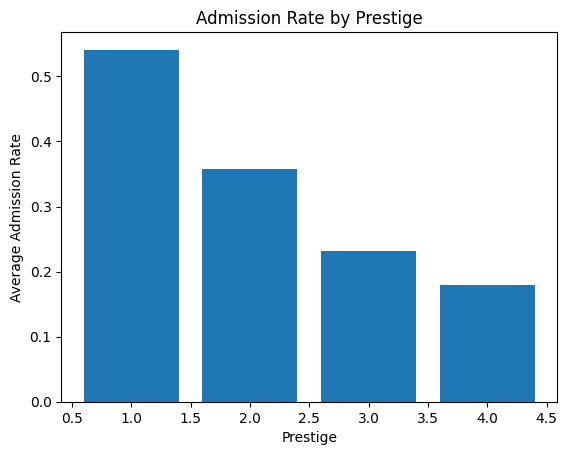

In [3]:
import matplotlib.pyplot as plt

# Group by 'prestige' and calculate the mean of 'admit' for each group
admit_means = df.groupby('prestige').admit.mean()

# Create a bar plot of the average admission rate for each prestige category
plt.bar(admit_means.index, admit_means.values)
plt.xlabel('Prestige')
plt.ylabel('Average Admission Rate')
plt.title('Admission Rate by Prestige')
plt.show()

Based on the data, it seems that 1 is the most prestigious and 4 is the least prestigious. This assumption is made by looking at the admission rates for each prestige category.

A prestige of 1 has the highest average admission rate at approximately 54%, indicating that students from the most prestigious colleges (prestige 1) have the highest chance of being admitted. On the other hand, a prestige of 4 has the lowest average admission rate at approximately 18%, suggesting that students from the least prestigious colleges (prestige 4) have the lowest chance of being admitted.

While this provides a good clue, it's always best to verify this kind of information with a subject matter expert or the data dictionary if one is available, as the interpretation could be context-specific.

This interpretation is only based on the provided data and does not involve PyTorch, as PyTorch is a library used for building and training machine learning models, not for data interpretation.

### Enhancing the Signal in the Data

In some situations, the signal in the data - that is, the relationship between the input variables and the output variable - might be too weak to be easily detectable. In our case, the signal for predicting college admission based on GPA, GRE score, and college prestige is not strong enough to serve our demonstration purposes. There are numerous other factors that influence college admission, and our current variables might not capture all of them.

**Remember, this is just for demonstration purposes and should never be done to your actual data.** To make the relationship between our predictors and the admission outcome clearer, we will artificially enhance the signal in the data. We will do this by making 10 copies of the dataset and adding an artificial signal to the `gpa` column in each of these copies. This artificial signal will be designed to improve the detectability of the `admit` outcome.

This approach will allow us to showcase the power of logistic regression more effectively, by creating a stronger, more detectable relationship between our predictors and the admission outcome.

In [4]:
# Import the required library
import numpy as np

# Grab all rows where prestige = 1. This filters the DataFrame df such that only rows with a prestige of 1 are selected.
# We're storing this filtered DataFrame in a variable named 'admit'.
admit = df[df['prestige'] == 1]

# Concatenate ten copies of the DataFrame 'admit'. We're doing this to artificially increase our sample size.
# The axis=0 argument specifies that we want to concatenate the DataFrames vertically (i.e., stack them on top of each other).
# The resulting DataFrame is stored in the same variable 'admit'.
admit = pd.concat([admit] * 10, axis=0)

# Set a random seed for reproducibility. This ensures that the same sequence of random numbers is generated each time the code is run.
np.random.seed(42)

# Add random noise to inflate the 'gpa' for students who were admitted (i.e., where 'admit' == 1).
# We're generating random numbers between 0 and 1 using np.random.random().
# The size argument specifies the number of random numbers to generate, which is the same as the number of admitted students in our 'admit' DataFrame.
# The '+=' operator is used to add these random numbers to the existing 'gpa' values of the admitted students.
admit.loc[admit['admit'] == 1, 'gpa'] += np.random.random(size=admit[admit.admit == 1].shape[0])

# Subtract random noise to deflate the 'gpa' for students who were not admitted (i.e., where 'admit' == 0).
# We're generating random numbers between 0 and 1 using np.random.random().
# The size argument specifies the number of random numbers to generate, which is the same as the number of not admitted students in our 'admit' DataFrame.
# The '-=' operator is used to subtract these random numbers from the existing 'gpa' values of the not admitted students.
admit.loc[admit['admit'] == 0, 'gpa'] -= np.random.random(size=admit[admit.admit == 0].shape[0])

## What If We Predicted `admit` With `gpa` Using Linear Regression?

You may already be familiar with **linear** regression:

### $$ \hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 + \cdots + \hat{\beta}_pX_p = \hat{\beta}_0 + \sum_{i=1}^p\hat{\beta}_jX_i $$

Where:

- $\hat{Y}$ is the predicted value of $Y$ based on all of the inputs $X_j$.
- $X_1$, $X_2$, $\ldots$, $X_p$ are the predictors.
- $\hat{\beta}_0$ is the estimated intercept.
- $\hat{\beta}_j$ is the estimated coefficient for the predictor $X_j$, the $j$th column in variable matrix $\mathbf{X}$.

Let's try predicting the `admit` binary indicator using just `gpa` with linear regression to understand the issue that arises.

In [5]:
# First, we define y and X. y is our target variable which represents the admission status of a student.
# X is our feature matrix which, in this case, only includes the 'gpa' feature.
# Note: X is usually a matrix, so we use double brackets to avoid a reshape request.
y = admit['admit']
X = admit[['gpa']]

# Import the train_test_split function from the sklearn.model_selection module.
from sklearn.model_selection import train_test_split

# Use the train_test_split function to split our data into training and testing sets.
# The test_size parameter is set to 0.33, meaning that 33% of the data will be used for testing and the rest for training.
# The random_state parameter is set to 42 to ensure that the split is reproducible. This means that every time the code is run, the data will be split in the same way.
X_OTHER, X_test, y_OTHER, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

# We further split the training data into training and validation sets.
# The validation set is used to evaluate the model during training and adjust the model parameters accordingly.
# This helps to avoid overfitting to the training data.
X_train, X_val, y_train, y_val = train_test_split(X_OTHER,
                                                    y_OTHER,
                                                    test_size=0.33,
                                                    random_state=42)

# Import the LinearRegression model from the sklearn.linear_model module.
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model. This creates an "empty" model which we'll later fit to our training data.
linear_regression = LinearRegression()

# Fit the LinearRegression model to our training data. This trains the model to learn the relationship between features (X_train) and target (y_train).
# The model learns by adjusting its parameters to minimize the difference between the predicted and actual target values.
linear_regression.fit(X_train, y_train)

# After the model is trained, we can access the intercept and coefficients of the linear regression line.
# The intercept is the y-value where the line crosses the y-axis, and the coefficient is the slope of the line.
# In a multiple regression model, there would be multiple coefficients - one for each feature.
print(f'Intercept: {linear_regression.intercept_}')
print(f'Coefficient: {linear_regression.coef_}')

Intercept: -1.2956958941162107
Coefficient: [0.5255498]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


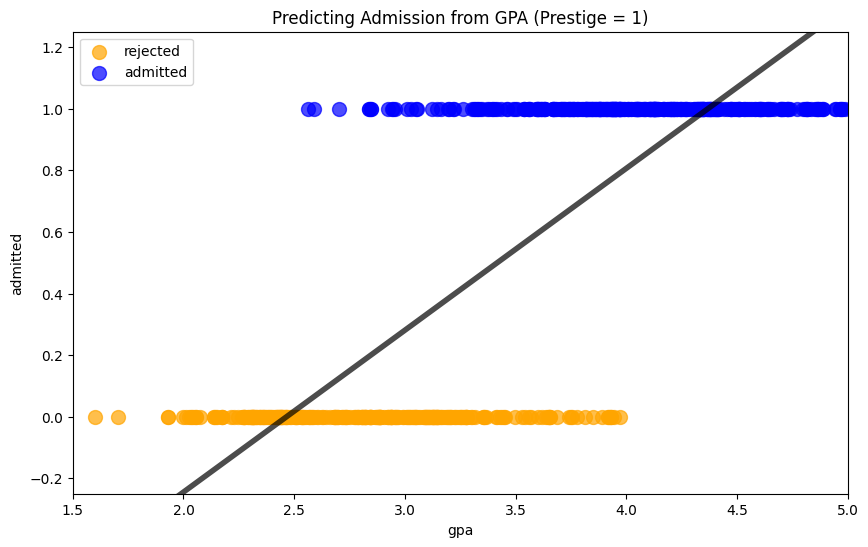

In [6]:
# Import the required library for creating figures.
import matplotlib.pyplot as plt

# Create a new figure and a set of subplots. This returns a Figure object and an Axes object or array of Axes objects.
# figsize=(10,6) sets the width and height of the figure in inches.
fig, ax = plt.subplots(figsize=(10,6))

# Create an array of evenly spaced values between 1 and 5 (both inclusive).
# 300 values will be generated in this range.
x_vals = np.linspace(1, 5, 300)

# Plot the line of best fit for the linear regression model.
# x_vals[:, np.newaxis] reshapes the array to have dimensions (n, 1) which is required for .predict().
# The line is colored black, with alpha=0.7 making it semi-transparent and lw=4 setting the line width.
ax.plot(x_vals,
        linear_regression.predict(x_vals[:, np.newaxis]),
        color='black', alpha=0.7, lw=4)

# Create a scatter plot for students who were rejected (admit = 0).
# Their GPA scores are plotted against their admit status (which will be at 0).
# The points are colored orange, sized 100, and semi-transparent.
ax.scatter(admit['gpa'][admit['admit'] == 0],
           admit['admit'][admit['admit'] == 0],
           c='orange',
           s=100,
           alpha=0.7,
           label='rejected')

# Create a scatter plot for students who were admitted (admit = 1).
# Their GPA scores are plotted against their admit status (which will be at 1).
# The points are colored blue, sized 100, and semi-transparent.
ax.scatter(admit['gpa'][admit['admit'] == 1],
           admit['admit'][admit['admit'] == 1],
           c='blue',
           s=100,
           alpha=0.7,
           label='admitted')

# Set the labels for the y-axis, x-axis, and the title of the plot, with their respective font sizes.
ax.set_ylabel('admitted')
ax.set_xlabel('gpa')
ax.set_title('Predicting Admission from GPA (Prestige = 1)')

# Set the limits of x-axis and y-axis.
ax.set_xlim(1.5, 5)
ax.set_ylim(-0.25, 1.25)

# Include a legend on the plot, located at the upper left corner.
plt.legend(loc='upper left')

# Display the plot.
plt.show()

## What do those coefficients mean?

In the context of a linear regression model, the coefficients represent the relationship between the independent variables and the dependent variable.

In this specific case, where we are predicting the `admit` binary indicator using `gpa` with linear regression, the coefficient for `gpa` indicates how much the predicted value of `admit` changes for each unit increase in `gpa`, holding all other factors constant.

If the coefficient is positive, it means that as `gpa` increases, the predicted probability of `admit` also increases. Conversely, if the coefficient is negative, it means that as `gpa` increases, the predicted probability of `admit` decreases.

The magnitude of the coefficient indicates the size of this effect. A larger absolute value of the coefficient means that `gpa` has a stronger effect on the prediction of `admit`.

The intercept term, or bias term in some contexts, represents the model's prediction for `admit` when all the independent variables are zero.

However, it is important to remember that in this case, the dependent variable `admit` is binary (only takes values 0 or 1). Thus, the linear regression might not be the best choice for this kind of problem as its output can range from $-\infty$ to $+\infty$. This is not a problem when predicting a continuous outcome variable that can take on any value within this range.

For instance, when we're dealing with binary classification problems, where the outcome we're predicting can only take the values 0 or 1, linear regression is not suitable. If we were to use a linear regression model for such a problem, we could end up with predicted values that are less than 0 or greater than 1, which would not make sense in the context of a binary classification problem.

Logistic regression is an alternative that is better suited for these kinds of problems. Unlike linear regression, logistic regression maps predicted values to the range of 0 to 1, making it an appropriate model for binary classification problems. It does this by passing the linear regression output through a logistic (or sigmoid) function, which essentially "squashes" the output to a value between 0 and 1.

## Predicting a Binary Class

In our specific scenario, we are dealing with two classes: `1=admitted` and `0=rejected`.

The target variable in logistic regression is still solving for $\hat{Y}$. However, in our binary classification case, $\hat{Y}$ is the probability of `y` being one of the classes.

### $$\hat{Y} = P(Y = 1)$$

We are still attempting to fit a "line" of best fit to this, but it won't be perfectly linear. We need to *guarantee* that the right-hand side of the regression equation will evaluate to a probability. In other words, we need to ensure that the outcome is a number between 0 and 1!

## The Logit Link Function

A vital part of logistic regression is the **logit link function**. This function allows us to "bend" our line of best fit into a curve that fits into the range of values we're interested in, in this case, a probability between 0 and 1.

The logit link function is defined as:

### $$\text{logit}\left(P(Y = 1)\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

This equation can also be rewritten as:

### $$\log\left(\frac{P(Y = 1)}{1 - P(Y = 1)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

In this equation, $P(Y = 1)$ is the probability of success, and $\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$ is the linear combination of predictors. The left side of the equation, $\log\left(\frac{P(Y = 1)}{1 - P(Y = 1)}\right)$, represents the log odds of success.

In logistic regression, we assume that each independent variable $X_i$ is linearly related to the log odds of success. This assumption allows us to use any values of $X$ inputs and predict probabilities between 0 and 1.

However, there's a trade-off. While the logit link function allows us to predict probabilities, the interpretation of a one-unit change in predictor variables becomes less straightforward. This is because a one-unit change in a predictor variable now corresponds to a change in the log-odds of the outcome variable, rather than a direct change in the outcome variable itself.

In [7]:
from sklearn.linear_model import LogisticRegression

# Step 1: Instantiate our model.
# Here we are creating an instance of the LogisticRegression model. This is equivalent to creating a "blueprint" of the model
# which specifies the details of the algorithm. At this point, the model is empty as we have not yet fitted it with any data.
logistic_regression = LogisticRegression()

# Step 2: Fit our model.
# In this step, we are fitting our model to the training data. The fit() method takes in our features (X_train) and
# target variable (y_train) as inputs and adjusts the model's parameters to find the best fit to the data.
# This process of fitting involves finding the parameters that minimize the difference (or 'error') between the predictions
# made by the model and the actual values of the target variable.
logistic_regression.fit(X_train, y_train)

# Once the model has been fitted, we can access its parameters. Specifically, we can access the intercept and coefficient
# of the logistic regression model.

# The intercept, also known as the bias, can be interpreted as the model's output when all the features are zero. However,
# in the context of logistic regression, it's the log-odds of the output being '1' when all features are zero.
print(f'Logistic Regression Intercept: {logistic_regression.intercept_}')

# The coefficient represents the change in the log-odds of the output being '1' for a one-unit increase in the feature.
# If the coefficient is positive, it means that as the feature increases, the log-odds of the output being '1' also
# increases, which implies that the probability of the output being '1' increases.
print(f'Logistic Regression Coefficient: {logistic_regression.coef_}')


Logistic Regression Intercept: [-13.43935152]
Logistic Regression Coefficient: [[3.93571098]]


### Using the log-odds — the natural logarithm of the odds.

The process of converting the "probability of success" to "odds of success," and then taking the logarithm of that, is known as the **logit link function**.

### $$\text{logit}\big(P(Y=1)\big) = \log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

We've bent our line as we want... but how do we interpret our coefficients?

### Odds

Probabilities and odds represent the same thing but in different ways. The odds for probability **p** is defined as:

### $$\text{odds}(p) = \frac{p}{1-p}$$

The odds of a probability is a measure of how many times more likely an event is to happen than not to happen.

**Example**: Let's suppose we're looking at the probability and odds of a particular football team, "Manchester United FC," winning a match.

- When **`p = 0.5`**: **`odds = 1 (1/2)`**
    - This means Manchester United FC is equally likely to win as they are to lose.
- When **`p = 0.75`**: **`odds = 3 (3/4)`**
    - This means Manchester United FC is three times as likely to win as they are to lose.
- When **`p = 0.67`**: **`odds = 2 (2/3)`**
    - This means Manchester United FC is two times as likely to win as they are to lose.

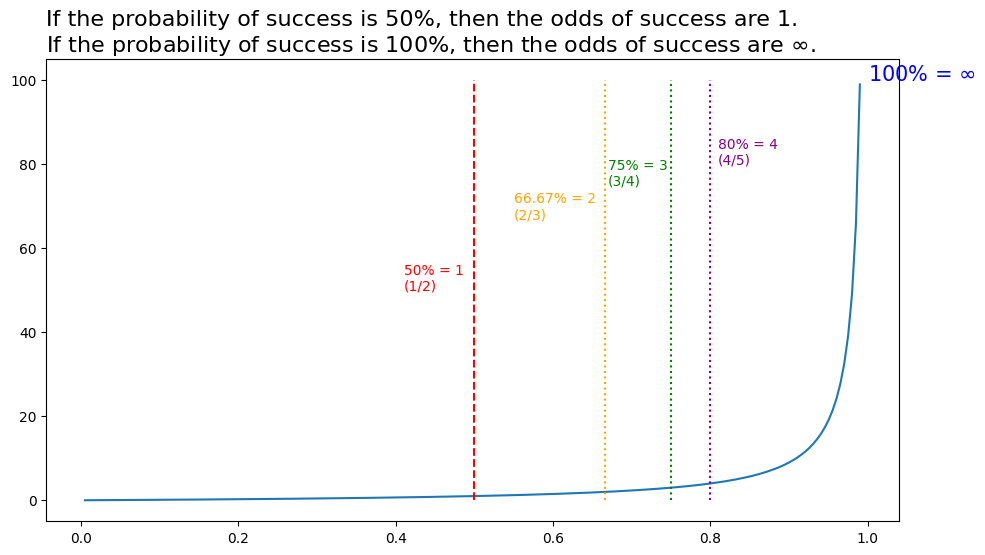

In [8]:
# Define a function "odds" that takes in a probability and returns the odds.
def odds(p: float) -> float:
    return p / (1 - p)

# Create a range of probabilities from 0.005 to 0.99.
probabilities = np.linspace(0.005, .99, 200)

# Calculate the corresponding odds for each probability.
odds_list = [odds(proba) for proba in probabilities]

# Create a new figure with a specific size.
plt.figure(figsize=(11,6))

# Plot the odds as a function of probability. This will be a blue line.
plt.plot(probabilities, odds_list)

# Add a vertical dashed red line at probability = 0.5. This represents the odds when probability is 50%.
plt.vlines(.5, 0, 100, linestyles="dashed", color='red')
# Add a text label for the red line.
plt.text(.41, 50, "50% = 1 \n(1/2)", color = 'red')

# Add a vertical dotted orange line at probability = 2/3. This represents the odds when probability is 66.67%.
plt.vlines(.6667, 0, 100, linestyles="dotted", color='orange')
# Add a text label for the orange line.
plt.text(.55, 67, "66.67% = 2 \n(2/3)", color='orange')

# Add a vertical dotted green line at probability = 3/4. This represents the odds when probability is 75%.
plt.vlines(.75, 0, 100, linestyles="dotted", color='green')
# Add a text label for the orange line.
plt.text(.67, 75, "75% = 3 \n(3/4)", color='green')

# Add a vertical dotted green line at probability = 4/5. This represents the odds when probability is 80%.
plt.vlines(.80, 0, 100, linestyles="dotted", color='purple')
# Add a text label for the orange line.
plt.text(.81, 80, "80% = 4 \n(4/5)", color='purple')

# Add a text label for the blue line at probability = 1.
plt.text(1, 100, "100% = $\\infty$", fontsize=15, color='blue')

# Add a title for the plot.
plt.title("If the probability of success is 50%, then the odds of success are 1.\nIf the probability of success is 100%, then the odds of success are $\\infty$.",
          ha = 'left',
          position = (0,1),
          fontsize=16)
# Display the plot.
plt.show()

## Interpreting a one-unit change in $X_i$.

$$\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

Given this model, a one-unit change in $X_i$ implies a $\beta_i$ unit change in the log odds of success.

**This is annoying**.

We often convert log-odds back to "regular odds" when interpreting our coefficient... our mind understands odds better than the log of odds.
"
So, let's get rid of the log on the left-hand side. Mathematically, we do this by "exponentiating" each side.

$$ \log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p $$
$$ \Downarrow $$
$$ e^{\Bigg\{\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg)\Bigg\}} = e^{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} $$
$$ \Downarrow $$
$$ \exp{\Bigg\{\log\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg)\Bigg\}} = \exp{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} $$
$$ \Downarrow $$
$$ \frac{P(Y=1)}{1-P(Y=1)} = \exp{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} $$

**Interpretation**: A one-unit change in $X_i$ means that success is $e^{\beta_i}$ times as likely.

I want to interpret the coefficient $\hat{\beta}_1$ for my logistic regression model. How would I interpret this coefficient?
    
- Our model is that $ln\bigg(\frac{P(admit=1)}{1-P(admit=1)}\bigg) = \beta_0 + \beta_1\text{GPA}$.
- As GPA increases by 1, the log-odds of someone being admitted increases by 0.77.
- As GPA increases by 1, someone is $e^{3.94}$ times as likely to be admitted.
- As GPA increases by 1, someone is about 51 times as likely to be admitted to grad school.

In [9]:
print(f'Logistic Regression Coefficient: {logistic_regression.coef_}')

Logistic Regression Coefficient: [[3.93571098]]


In [10]:
# Use np.exp() to exponentiate the coefficient.
np.exp(logistic_regression.coef_)

array([[51.19853815]])